# PROYECTO INDIVIDUAL - PARTE 2
### DATA ANALYTICS - ACCIDENTES AEREOS

**1-Importamos las librerias necesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2- Cargamos los datos a un dataframe de pandas**

In [2]:
df_accidente = pd.read_csv("AccidentesAviones.csv", sep=",")
df_accidente = df_accidente.iloc[:, 1:] #Elimino la primera columna que no es necesaria, porque es numeracion de filas
pd.set_option('display.max_columns', None)

**3-Hacemos una exploración inicial**

*En esta exploración inicial podemos notar que:*
* *El dataframe presenta una dimensión de 5008 filas con 17 columnas*
* *No se reflejan nulos en el dataframe debido a que los nulos fueron reemplazados por "?", a los cuales se les debe dar un tratamiento especial*
* *Las columnas no presentan el tipo de dato adecuado*

In [52]:
#Visualizamos el dataset
df_accidente.head(3)

,Fecha,Hora,Origen-Destino,Operador,N° de Vuelo,Ruta Detallada,Tipo aeronave_accidente,Registro_Aeronave,Linea_produccion,Total_a_bordo,Pasajeros,Tripulacion,Total_Fallecidos,Pasajeros_Fallecidos,Tripulantes_Fallecidos,Muertos_en_tierra,resumen
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Sin dato,Demonstration,Wright Flyer III,Sin dato,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaT,"Juvisy-sur-Orge, France",Sin dato,Sin dato,Air show,Wright Byplane,SC1,Sin dato,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Sin dato,Test flight,Dirigible,Sin dato,Sin dato,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [4]:
# revisamos dimensiones del dataframe
df_accidente.shape

(5008, 17)

In [5]:
#Revisamos si existen nulos
nulos_dataset =  df_accidente.isnull().sum().sum()
nulos_variable = df_accidente.isnull().sum()
print("Existen ", nulos_dataset, " a nivel de dataset")
print("Existen los siguientes nulos por variable: ", 
     nulos_variable )

Existen  0  a nivel de dataset
Existen los siguientes nulos por variable:  fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64


In [6]:
#revisamos tipos de datos por columna
df_accidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5008 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  grou

**5-Normalizamos nombres de las columnas**

In [3]:
df_accidente = df_accidente.rename(columns={'fecha': 'Fecha'})
df_accidente = df_accidente.rename(columns={'HORA declarada': 'Hora'})
df_accidente = df_accidente.rename(columns={'OperadOR': 'Operador'})
df_accidente = df_accidente.rename(columns={'flight_no': 'N° de Vuelo'})
df_accidente = df_accidente.rename(columns={'Ruta':'Origen-Destino', 'route':'Ruta Detallada'})
df_accidente = df_accidente.rename(columns={'ac_type': 'Tipo aeronave_accidente'})
df_accidente = df_accidente.rename(columns={'registration': 'Registro_Aeronave'})
df_accidente = df_accidente.rename(columns={'cn_ln': 'Linea_produccion'})
df_accidente = df_accidente.rename(columns={'all_aboard': 'Total_a_bordo'})
df_accidente = df_accidente.rename(columns={'PASAJEROS A BORDO': 'Pasajeros'})
df_accidente = df_accidente.rename(columns={'crew_aboard': 'Tripulacion'})
df_accidente = df_accidente.rename(columns={'cantidad de fallecidos': 'Total_Fallecidos'})
df_accidente = df_accidente.rename(columns={'passenger_fatalities': 'Pasajeros_Fallecidos'})
df_accidente = df_accidente.rename(columns={'crew_fatalities': 'Tripulantes_Fallecidos'})
df_accidente = df_accidente.rename(columns={'ground': 'Muertos_en_tierra'})
df_accidente = df_accidente.rename(columns={'summary': 'resumen'})

**4-Revisamos y tratamos los datos que se encuentran como "?"**

In [4]:
#Revisamos en cada columna cuantas instancias se encuentran como "?"

print("en la columna Fecha hay: ", len(df_accidente[df_accidente["Fecha"] == "?"]), "datos como ?")
print("en la columna Hora hay: ", len(df_accidente[df_accidente["Hora"] == "?"]), "datos como ?")
print("en la columna Origen-destino hay: ", len(df_accidente[df_accidente["Origen-Destino"] == "?"]), "datos como ?")
print("en la columna Ruta detallada hay: ", len(df_accidente[df_accidente["Ruta Detallada"] == "?"]), "datos como ?")
print("en la columna Operador hay: ", len(df_accidente[df_accidente["Operador"] == "?"]), "datos como ?")
print("en la columna N° de Vuelo hay: ", len(df_accidente[df_accidente["N° de Vuelo"] == "?"]), "datos como ?")
print("en la columna Tipo aeronave_accidente hay: ", len(df_accidente[df_accidente["Tipo aeronave_accidente"] == "?"]), "datos como ?")
print("en la columna Registro_Aeronave hay: ", len(df_accidente[df_accidente["Registro_Aeronave"] == "?"]), "datos como ?")
print("en la columna Linea_produccion hay: ", len(df_accidente[df_accidente["Linea_produccion"] == "?"]), "datos como ?")
print("en la columna Total_a_bordo hay: ", len(df_accidente[df_accidente["Total_a_bordo"] == "?"]), "datos como ?")
print("en la columna Pasajeros hay: ", len(df_accidente[df_accidente["Pasajeros"] == "?"]), "datos como ?")
print("en la columna Tripulacion hay: ", len(df_accidente[df_accidente["Tripulacion"] == "?"]), "datos como ?")
print("en la columna Total_Fallecidos hay: ", len(df_accidente[df_accidente["Total_Fallecidos"] == "?"]), "datos como ?")
print("en la columna Pasajeros_Fallecidos hay: ", len(df_accidente[df_accidente["Pasajeros_Fallecidos"] == "?"]), "datos como ?")
print("en la columna Tripulantes_Fallecidos hay: ", len(df_accidente[df_accidente["Tripulantes_Fallecidos"] == "?"]), "datos como ?")
print("en la columna Muertos_en_tierra hay: ", len(df_accidente[df_accidente["Muertos_en_tierra"] == "?"]), "datos como ?")
print("en la columna resumen hay: ", len(df_accidente[df_accidente["resumen"] == "?"]), "datos como ?")

en la columna Fecha hay:  0 datos como ?
en la columna Hora hay:  1504 datos como ?
en la columna Origen-destino hay:  5 datos como ?
en la columna Ruta detallada hay:  762 datos como ?
en la columna Operador hay:  10 datos como ?
en la columna N° de Vuelo hay:  3682 datos como ?
en la columna Tipo aeronave_accidente hay:  13 datos como ?
en la columna Registro_Aeronave hay:  272 datos como ?
en la columna Linea_produccion hay:  667 datos como ?
en la columna Total_a_bordo hay:  17 datos como ?
en la columna Pasajeros hay:  221 datos como ?
en la columna Tripulacion hay:  219 datos como ?
en la columna Total_Fallecidos hay:  8 datos como ?
en la columna Pasajeros_Fallecidos hay:  235 datos como ?
en la columna Tripulantes_Fallecidos hay:  235 datos como ?
en la columna Muertos_en_tierra hay:  44 datos como ?
en la columna resumen hay:  59 datos como ?


In [5]:
#Reemplazamos ? por un dato más adecuado acorde al tipo de columna

df_accidente['Fecha'] = df_accidente['Fecha'].replace('?', pd.NaT) # Reemplazar los valores "?" con NaT
df_accidente['Hora'] = df_accidente['Hora'].replace('?', pd.NaT) # Reemplazar los valores "?" con NaT
df_accidente['Origen-Destino'] = df_accidente['Origen-Destino'].replace('?', "Sin dato") # Reemplazar los valores "?" por "Sin dato"
df_accidente['Operador'] = df_accidente['Operador'].replace('?', "Sin dato") # Reemplazar los valores "?" por "Sin dato"
df_accidente['N° de Vuelo'] = df_accidente['N° de Vuelo'].replace('?', "Sin dato") # Reemplazar los valores "?" por "Sin dato"
df_accidente['Ruta Detallada'] = df_accidente['Ruta Detallada'].replace('?', "Sin dato")# Reemplazar los valores "?" por "Sin dato"
df_accidente['Tipo aeronave_accidente'] = df_accidente['Tipo aeronave_accidente'].replace('?', "Sin dato") # "Reemplazar los valores "?" por "Sin dato"
df_accidente['Registro_Aeronave'] = df_accidente['Registro_Aeronave'].replace('?', "Sin dato") # Reemplazar los valores "?" por "Sin dato"
df_accidente['Linea_produccion'] = df_accidente['Linea_produccion'].replace('?', "Sin dato") # Reemplazar los valores "?" por "Sin dato"
df_accidente['Total_a_bordo'] = df_accidente['Total_a_bordo'].replace('?', 0) # Reemplazar los valores "?" por cero
df_accidente['Pasajeros'] = df_accidente['Pasajeros'].replace('?', 0) # Reemplazar los valores "?" por cero
df_accidente['Tripulacion'] = df_accidente['Tripulacion'].replace('?', 0) # Reemplazar los valores "?" por 0
df_accidente['Total_Fallecidos'] = df_accidente['Total_Fallecidos'].replace('?', 0) # Reemplazar los valores "?" por cero
df_accidente['Pasajeros_Fallecidos'] = df_accidente['Pasajeros_Fallecidos'].replace('?', 0)# Reemplazar los valores "?" por cero
df_accidente['Tripulantes_Fallecidos'] = df_accidente['Tripulantes_Fallecidos'].replace('?', 0)# Reemplazar los valores "?" por cero
df_accidente['Muertos_en_tierra'] = df_accidente['Muertos_en_tierra'].replace('?', 0) #Reemplazar los valores "?" por cero
df_accidente['resumen'] = df_accidente['resumen'].replace('?', "Sin dato")# Reemplazar los valores "?" por "Sin dato"

**5-Convertimos columnas a formatos adecuados**

In [6]:
#Convertimos a formato numerico las columnas pertinentes
columnas_numericas = ['Total_a_bordo', 'Pasajeros', 'Tripulacion', 'Total_Fallecidos', 'Pasajeros_Fallecidos', 'Tripulantes_Fallecidos', 'Muertos_en_tierra']
df_accidente[columnas_numericas] = df_accidente[columnas_numericas].astype(int)

In [7]:
# convertimos la hora a formato pertinente
df_accidente["Hora"] = df_accidente["Hora"].str.replace("c ", "")
df_accidente["Hora"] = pd.to_datetime(df_accidente["Hora"], format="%H%M", errors='coerce').dt.strftime("%H:%M")

In [8]:
# Convertimos la Fecha a formato corto
df_accidente["Fecha"] = pd.to_datetime(df_accidente["Fecha"], format="%B %d, %Y").dt.strftime("%Y-%m-%d")

**5-Validamos si aun presentamos nulos con un gráfico**

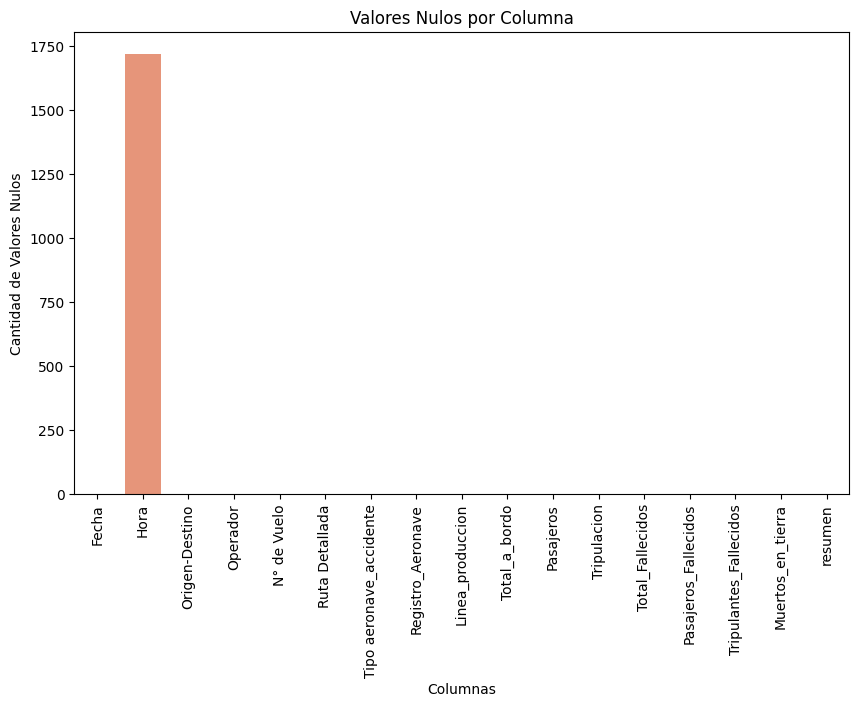

In [9]:
# Contar los valores nulos en cada columna
null_counts = df_accidente.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos por Columna')
plt.show()

## SOlO SE EVIDENCIAN NULOS EN LA COLUMNA HORA, LA CUAL LA DEJAREMOS ASI PARA NO ALTERAR LOS DATOS

**6-Estadisticas descriptivas**

* *6.1-Columnas numericas*

In [10]:
df_accidente.describe()

,Total_a_bordo,Pasajeros,Tripulacion,Total_Fallecidos,Pasajeros_Fallecidos,Tripulantes_Fallecidos,Muertos_en_tierra
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1.703275
std,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,55.251400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000
50%,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,0.000000
75%,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


*6.2-Columnas categoricas*

In [11]:
df_accidente.describe(include="object")

,Fecha,Hora,Origen-Destino,Operador,N° de Vuelo,Ruta Detallada,Tipo aeronave_accidente,Registro_Aeronave,Linea_produccion,resumen
count,5008,3287,5008,5008,5008,5007,5008,5008,5008,5008
unique,4577,1036,4125,2268,893,3838,2469,4701,3908,4858
top,1988-08-31,15:00,"Moscow, Russia",Aeroflot,Sin dato,Sin dato,Douglas DC-3,Sin dato,Sin dato,Sin dato
freq,4,35,16,253,3682,762,333,272,667,59


**7-Valores atipicos Columnas númericas**

*Explorando las columnas numericas podemos visualizar que se presentan algunos valores atipicos que están por encima del umbral máximo , lo que indica que:*
* *El 10% (508) de los accidentes tuvieron más de 600 personas a bordo entre pasajeros y tripulantes*
* *El 10%(500) de los accidentes tuvieron más de 600 pasajeros*
* *El 3%(151) de los acciendentes contaban con una tripulación de más de 80 personas*
* *El 9%(454) de los accidentes presentó más de 580 fallecidos*
* *El 9%(450) de los accidentes presentó más de 560 pasajeros fallecidos*
* *El 2.4%(122) de los accidentes presentó más de 40 tripulantes fallecidos*
* *El 5%(248) de los accidentes fueron una gran catastrofe con más de 2750 muertos en tierra*

**Observa los indicadores:**

In [12]:
# Obtener columnas numéricas
columnas_numericas = df_accidente.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico (IQR) para cada columna numérica
q1 = columnas_numericas.quantile(0.25)
q3 = columnas_numericas.quantile(0.75)
iqr = q3 - q1

# Calcular la mediana (quartil 0.5)
mediana = columnas_numericas.median()

# Definir los límites superior e inferior para detectar outliers
umbral_superior = q3 + 1.5 * iqr
umbral_inferior = q1 - 1.5 * iqr

# Detectar outliers en cada columna numérica
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior))

# Obtener el número de outliers en cada columna
num_outliers = outliers.sum()

# Obtener la cantidad de valores por debajo del mínimo y por encima del máximo para cada columna
valores_por_debajo_min = (columnas_numericas < umbral_inferior).sum()
valores_por_encima_max = (columnas_numericas > umbral_superior).sum()

# Obtener los umbrales mínimo y máximo por columna
umbral_minimo = columnas_numericas.min()
umbral_maximo = columnas_numericas.max()

# Crear una tabla con los resultados
tabla_resultados = pd.DataFrame({
    "Número de outliers": num_outliers,
    "Valores por debajo del mínimo": valores_por_debajo_min,
    "Valores por encima del máximo": valores_por_encima_max,
    "Umbral mínimo": umbral_minimo,
    "Umbral máximo": umbral_maximo,
    "Mediana": mediana
})

# Imprimir la tabla de resultados
print(tabla_resultados)


                        Número de outliers  Valores por debajo del mínimo   
Total_a_bordo                          508                              0  \
Pasajeros                              500                              0   
Tripulacion                            151                              0   
Total_Fallecidos                       454                              0   
Pasajeros_Fallecidos                   450                              0   
Tripulantes_Fallecidos                 122                              0   
Muertos_en_tierra                      248                              0   

                        Valores por encima del máximo  Umbral mínimo   
Total_a_bordo                                     508              0  \
Pasajeros                                         500              0   
Tripulacion                                       151              0   
Total_Fallecidos                                  454              0   
Pasajeros_Fallecidos   

**8-Distribución de los datos en las columnas númericas**

*8.1-Columna "Total_a_bordo"*

*El valor de IQR para la columna "Total_a_bordo" es de 28.25. Esto indica que el rango intercuartílico de la cantidad total de personas a bordo en los accidentes aéreos es relativamente pequeño, con una variación de aproximadamente 28 personas +/- que la mediana de 16 personas. Sin embargo, el umbral máximo de 644 indica que al menos el 10% de los accidentes tuvieron una cantidad excepcionalmente alta de personas a bordo, superando este límite.*

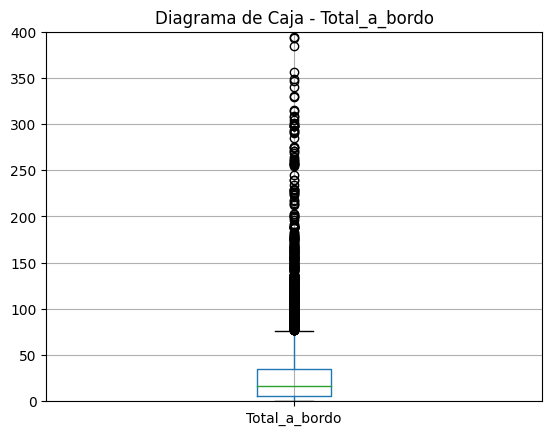

In [13]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Total_a_bordo")
plt.title('Diagrama de Caja - Total_a_bordo')
plt.ylim(0,400)
plt.show()


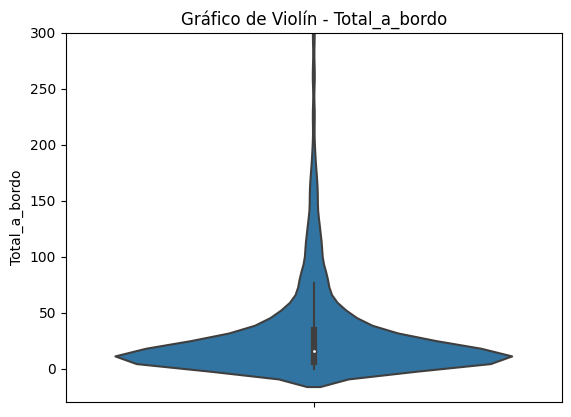

In [14]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Total_a_bordo")
plt.title('Gráfico de Violín - Total_a_bordo')
plt.ylabel("Total_a_bordo")
plt.ylim(-30,300)
plt.show()

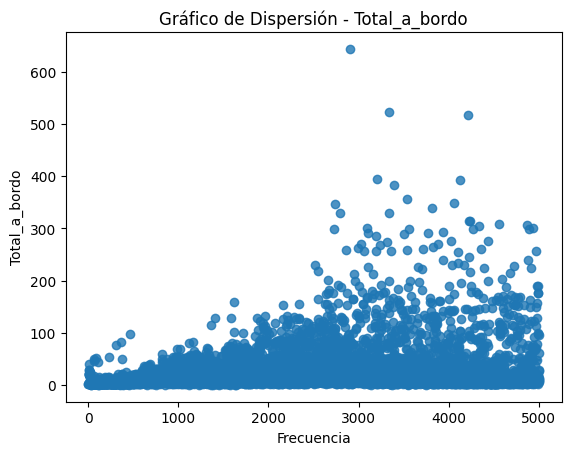

In [15]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Total_a_bordo"])
plt.title('Gráfico de Dispersión - Total_a_bordo')
plt.xlabel('Frecuencia')
plt.ylabel('Total_a_bordo')
plt.show()


*8.2.Columna Pasajeros*

*Para la columna "Pasajeros", el valor de IQR es de 27. Esto sugiere que la cantidad de pasajeros en los accidentes aéreos tiende a tener una variación relativamente baja, con un rango intercuartílico de aproximadamente 27 pasajeros +/- la mediana de 11 personas. Sin embargo, el umbral máximo de 614 indica que al menos el 10% de los accidentes presentaron una cantidad inusualmente alta de pasajeros, superando este límite.*

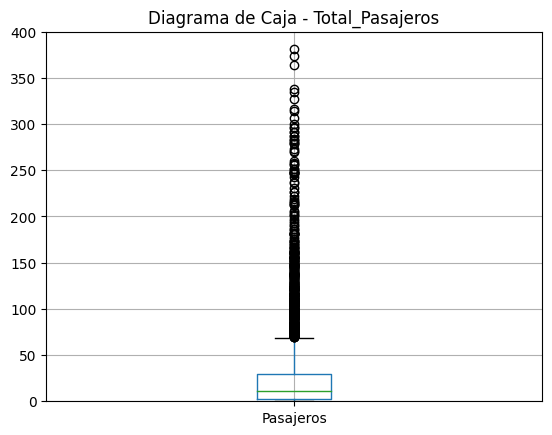

In [173]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Pasajeros")
plt.title('Diagrama de Caja - Total_Pasajeros')
plt.ylim(0,400)
plt.show()

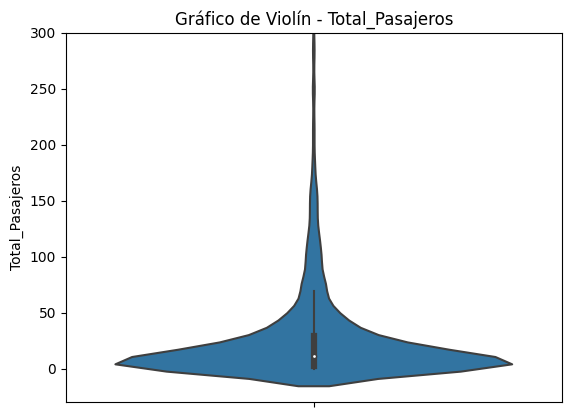

In [16]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Pasajeros")
plt.title('Gráfico de Violín - Total_Pasajeros')
plt.ylabel("Total_Pasajeros")
plt.ylim(-30,300)
plt.show()

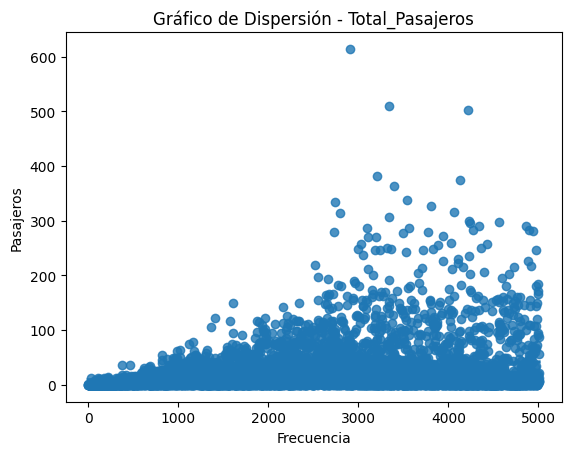

In [17]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Pasajeros"])
plt.title('Gráfico de Dispersión - Total_Pasajeros')
plt.xlabel('Frecuencia')
plt.ylabel('Pasajeros')
plt.show()

*8.3- Columna Tripulación*

*La columna "Tripulacion" tiene un valor de IQR de 4, lo que sugiere que la cantidad de tripulantes en los accidentes aéreos tiende a tener una variación relativamente baja, con un rango intercuartílico de aproximadamente 4 tripulantes +/- que la mediana de 3 personas. El umbral máximo de 83 indica que al menos el 3% de los accidentes contaron con una tripulación excepcionalmente grande, superando este límite.*

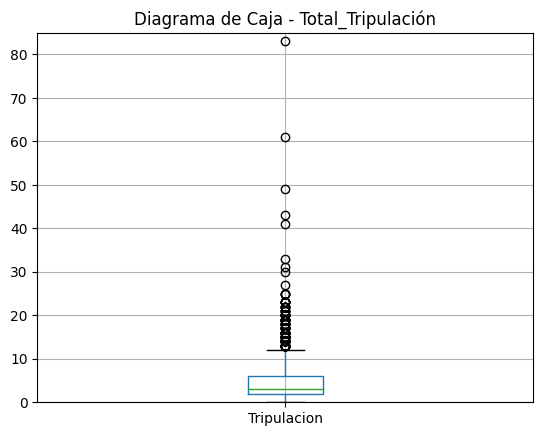

In [18]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Tripulacion")
plt.title('Diagrama de Caja - Total_Tripulación')
plt.ylim(0,85)
plt.show()

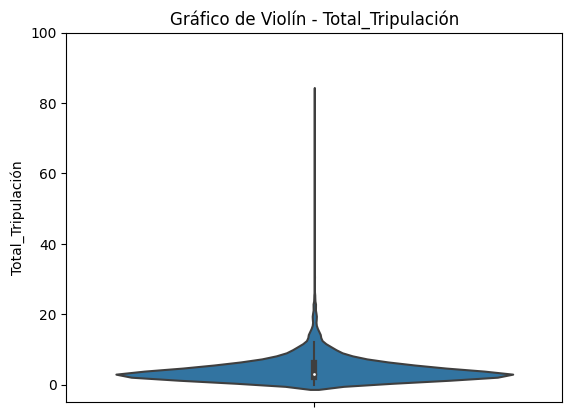

In [19]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Tripulacion")
plt.title('Gráfico de Violín - Total_Tripulación')
plt.ylabel("Total_Tripulación")
plt.ylim(-5,100)
plt.show()

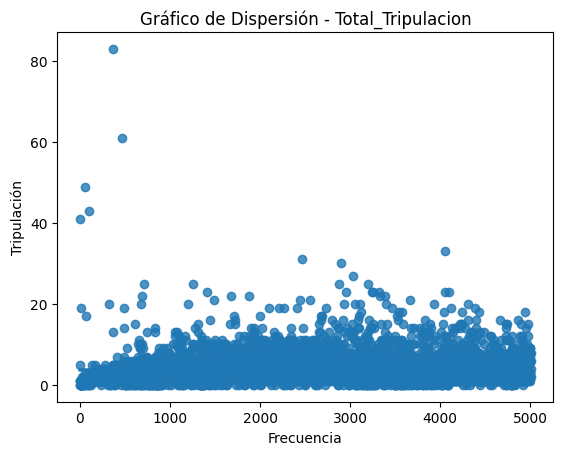

In [20]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Tripulacion"])
plt.title('Gráfico de Dispersión - Total_Tripulacion')
plt.xlabel('Frecuencia')
plt.ylabel('Tripulación')
plt.show()

*8.4-Columna Total_Fallecidos*

*En la columna "Total_Fallecidos", el valor de IQR es de 21. Esto indica que el rango intercuartílico de la cantidad total de personas fallecidas en los accidentes aéreos es relativamente pequeño, con una variación de aproximadamente 21 personas +/- la mediana de 11 fallecidos. Sin embargo, el umbral máximo de 583 indica que al menos el 9% de los accidentes presentaron una cantidad inusualmente alta de fallecidos, superando este límite.*

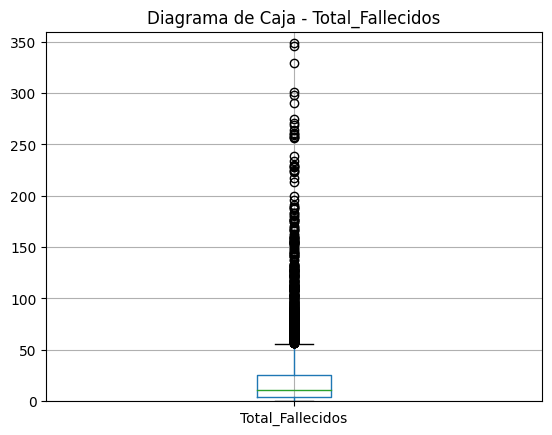

In [21]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Total_Fallecidos")
plt.title('Diagrama de Caja - Total_Fallecidos')
plt.ylim(0,360)
plt.show()

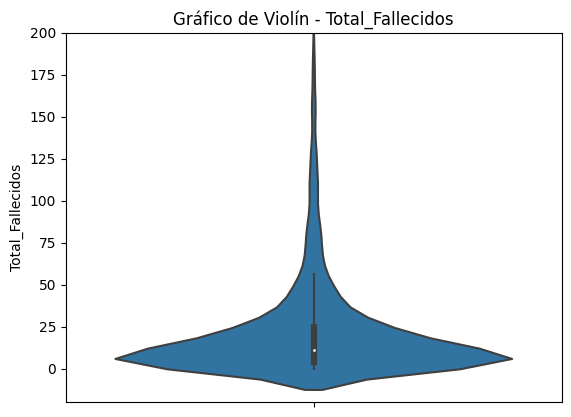

In [22]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Total_Fallecidos")
plt.title('Gráfico de Violín - Total_Fallecidos')
plt.ylabel("Total_Fallecidos")
plt.ylim(-20,200)
plt.show()

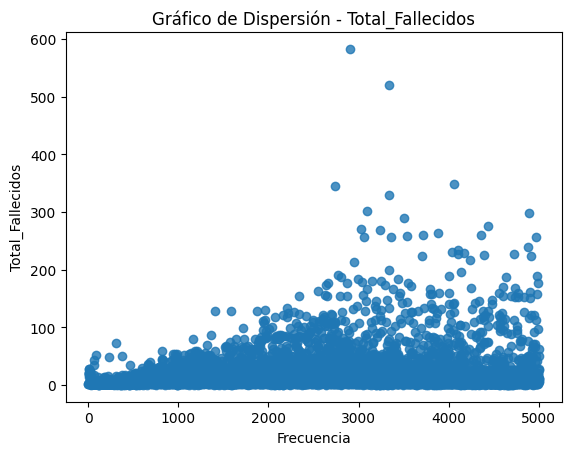

In [23]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Total_Fallecidos"])
plt.title('Gráfico de Dispersión - Total_Fallecidos')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Fallecidos')
plt.show()

*8.5-Columna Pasajeros_Fallecidos*

*Para la columna "Pasajeros_Fallecidos", el valor de IQR es de 20. Esto sugiere que la cantidad de pasajeros fallecidos en los accidentes aéreos tiende a tener una variación relativamente baja, con un rango intercuartílico de aproximadamente 20 pasajeros +/- la mediana de 7 pasajeros. Sin embargo, el umbral máximo de 560 indica que al menos el 9% de los accidentes tuvieron una cantidad excepcionalmente alta de pasajeros fallecidos, superando este límite.*

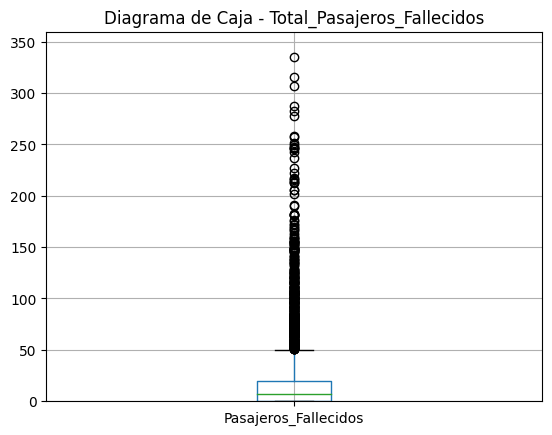

In [206]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Pasajeros_Fallecidos")
plt.title('Diagrama de Caja - Total_Pasajeros_Fallecidos')
plt.ylim(0,360)
plt.show()

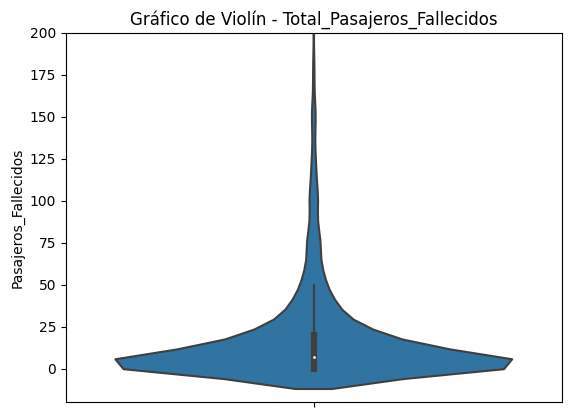

In [207]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Pasajeros_Fallecidos")
plt.title('Gráfico de Violín - Total_Pasajeros_Fallecidos')
plt.ylabel("Pasajeros_Fallecidos")
plt.ylim(-20,200)
plt.show()

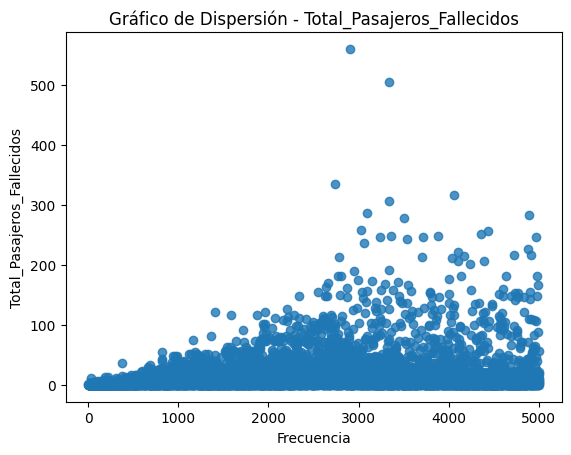

In [208]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Pasajeros_Fallecidos"])
plt.title('Gráfico de Dispersión - Total_Pasajeros_Fallecidos')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Pasajeros_Fallecidos')
plt.show()

*8.6-Columna Tripulantes_Fallecidos*

*La columna "Tripulantes_Fallecidos" tiene un valor de IQR de 4 tripulantes , lo que sugiere que la cantidad de tripulantes fallecidos en los accidentes aéreos tiende a tener una variación relativamente baja, con un rango intercuartílico de aproximadamente 4 tripulantes +/- de la mediana de 3 tripulantes. El umbral máximo de 43 indica que al menos el 2.4% de los accidentes presentaron una cantidad inusualmente alta de tripulantes fallecidos, superando este límite.*

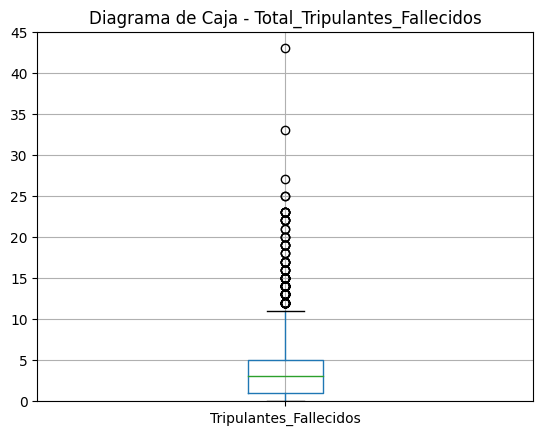

In [211]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Tripulantes_Fallecidos")
plt.title('Diagrama de Caja - Total_Tripulantes_Fallecidos')
plt.ylim(0,45)
plt.show()

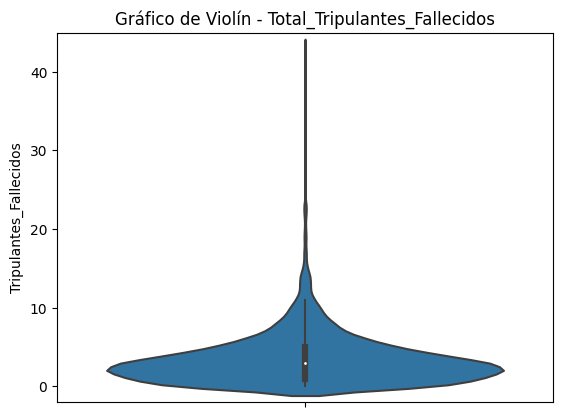

In [220]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Tripulantes_Fallecidos")
plt.title('Gráfico de Violín - Total_Tripulantes_Fallecidos')
plt.ylabel("Tripulantes_Fallecidos")
plt.ylim(-2,45)
plt.show()

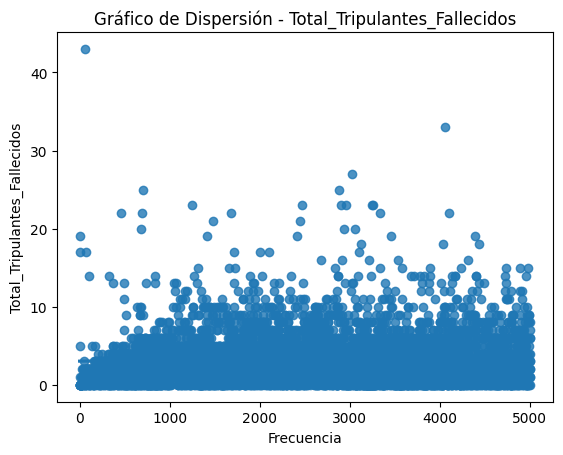

In [221]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Tripulantes_Fallecidos"])
plt.title('Gráfico de Dispersión - Total_Tripulantes_Fallecidos')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Tripulantes_Fallecidos')
plt.show()

*8.7-Columna Muertos_en_tierra*

*La columna "Muertos_En_tierra" muestra 248 outliers, indicando que en un pequeño porcentaje de accidentes aéreos se produjeron un número excepcionalmente alto de muertos en tierra, superando el umbral máximo de 2750. Sin embargo, es importante destacar que el IQR para esta columna es de 0, lo que sugiere que la mayoría de los accidentes no involucran muertos en tierra o que el número de víctimas es generalmente bajo y no varía significativamente.*

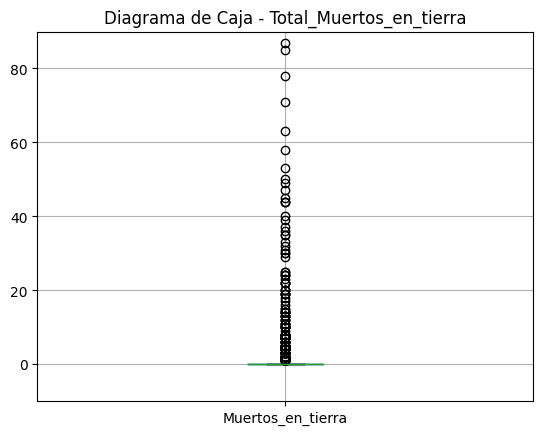

In [227]:
# Diagrama de caja

plt.figure()
df_accidente.boxplot(column="Muertos_en_tierra")
plt.title('Diagrama de Caja - Total_Muertos_en_tierra')
plt.ylim(-10,90)
plt.show()

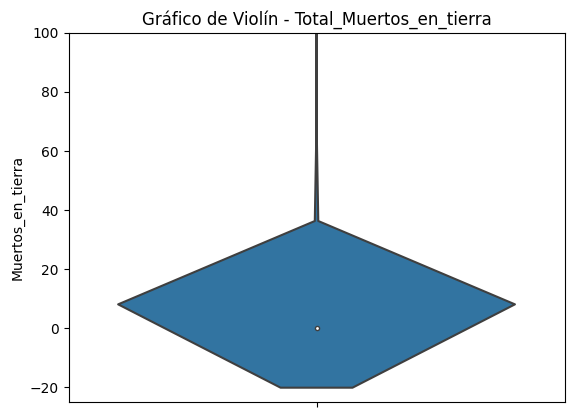

In [235]:
# Crear el gráfico de violín
plt.figure()
sns.violinplot(data=df_accidente, y="Muertos_en_tierra")
plt.title('Gráfico de Violín - Total_Muertos_en_tierra')
plt.ylabel("Muertos_en_tierra")
plt.ylim(-25,100)
plt.show()

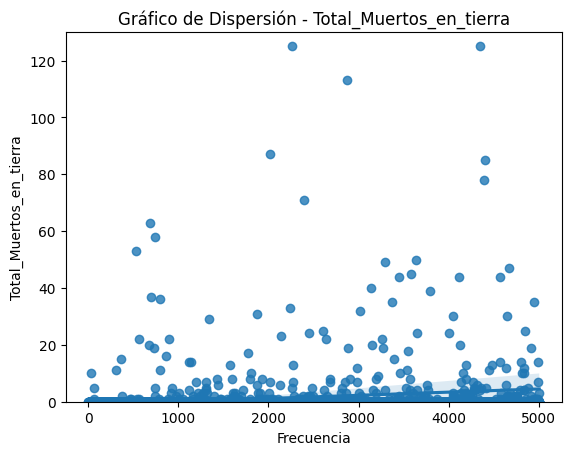

In [241]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df_accidente.index, y=df_accidente["Muertos_en_tierra"])
plt.title('Gráfico de Dispersión - Total_Muertos_en_tierra')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Muertos_en_tierra')
plt.ylim(0,130)
plt.show()

*9-Distribución de los datos columnas categoricas*

*9.1-Columna Fecha*

*Las dos fechas con más accidentes en la historia son: 31-08-1988 y 11-09-2001*
*El 11 de septiembre de 2001 se puede relacionar con los ataques terroristas en Estados Unidos, donde varios aviones comerciales fueron secuestrados y utilizados como armas.*

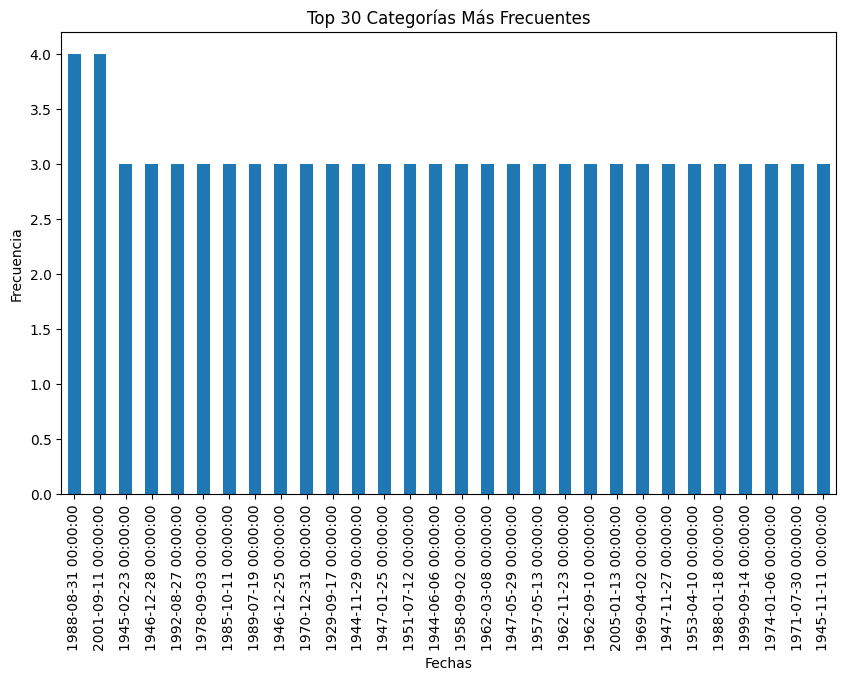

In [91]:
# Las 30 fechas con mas accidentes aereos
frecuencias_top30 = df_accidente['Fecha'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Categorías Más Frecuentes')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


*9.2-Columna Hora*

*Las horas en que más suceden los accidentes son despúes del medio dia (11:00), las top 5 son: 15:00, 14:00, 11:00, 17:00 y 16:00*

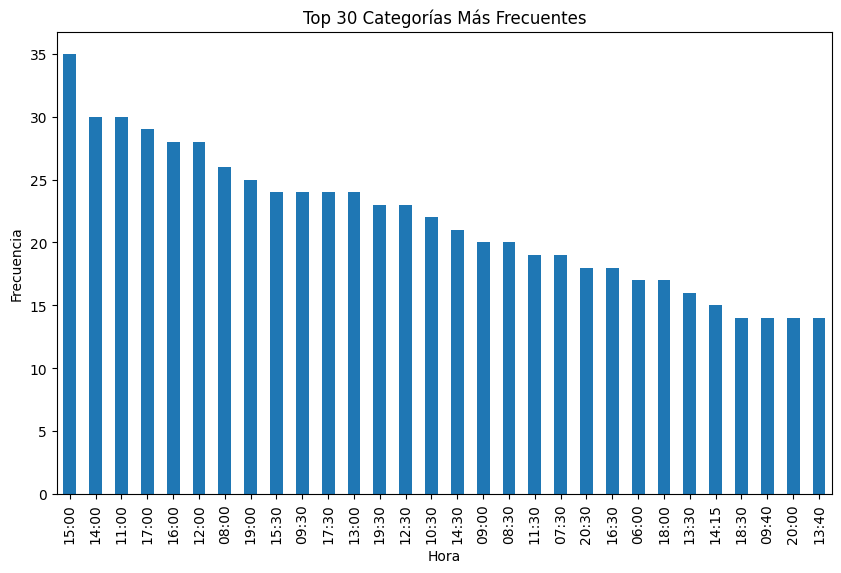

In [87]:
# Las 30 Horas con mas accidentes aereos

frecuencias_top30 = df_accidente['Hora'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Categorías Más Frecuentes')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

*9.3-Columna Origen-Destino*

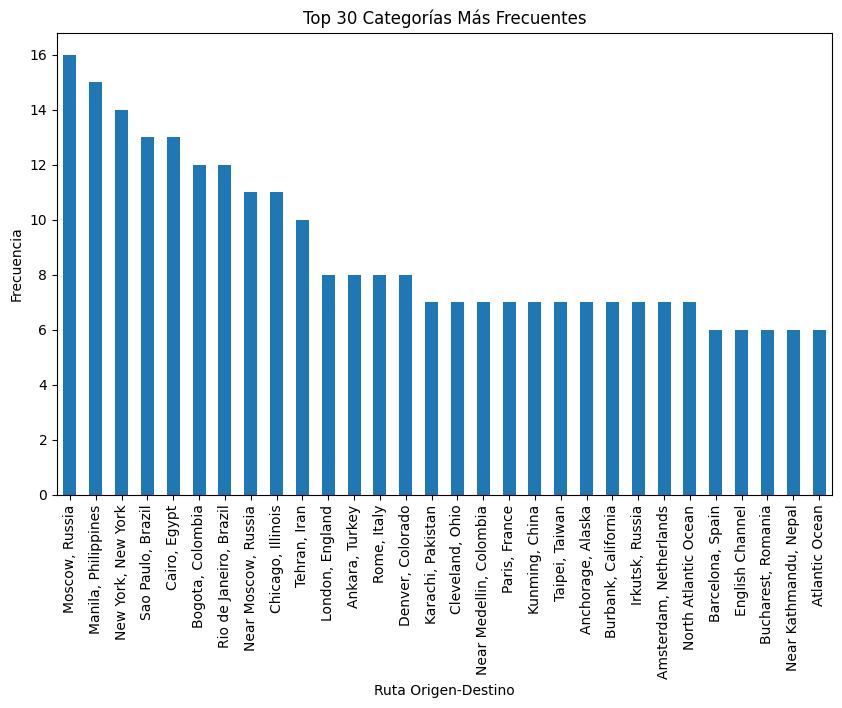

In [265]:
# Las 30 rutas con mas accidentes aereos

frecuencias_top30 = df_accidente['Origen-Destino'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Categorías Más Frecuentes')
plt.xlabel('Ruta Origen-Destino')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

*9.4-Columna Operador*

*las aerolineas con más accidentes presentados, top 5 con más de 45 accidentes: Aeroflot, Military U.S Air Force, Air France, Deutsche Lufthansa y United Air Lines.*

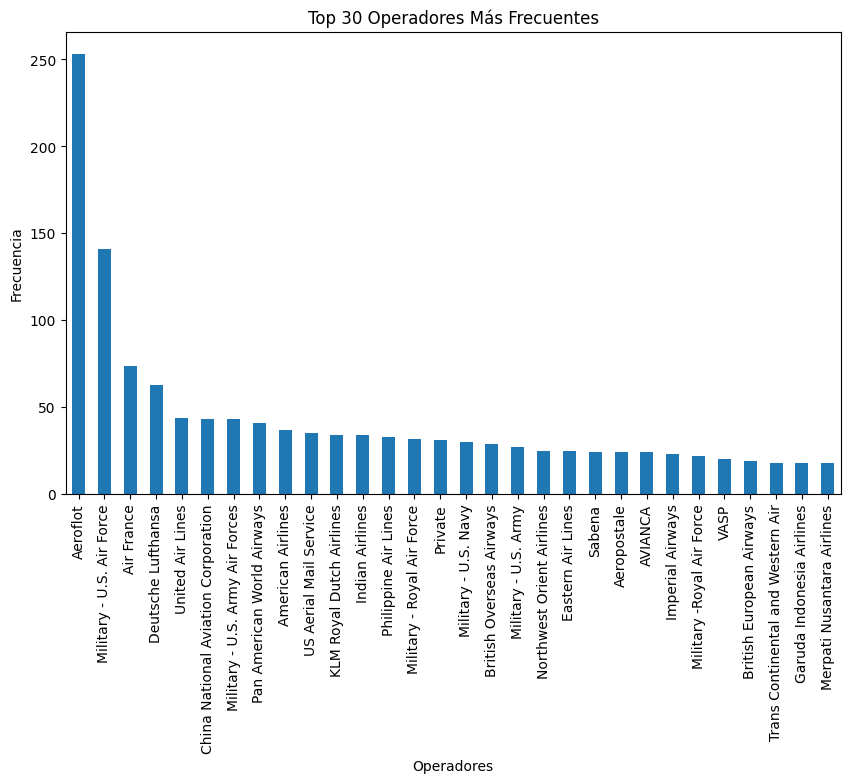

In [88]:
# Los 30 Operadores con mas accidentes aereos

frecuencias_top30 = df_accidente['Operador'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Operadores Más Frecuentes')
plt.xlabel('Operadores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

*9.5-Columna Ruta Detallada*

*Las 3 rutas de vuelo con más accidentes corresponden a: Training, sightseeing y Testflight*

*Una conclusión interesante es que las rutas de vuelo con más accidentes son aquellas relacionadas con actividades específicas de la aviación, como entrenamiento, turismo de observación y vuelos de prueba. Esto sugiere que estas actividades pueden presentar desafíos adicionales o mayores riesgos en comparación con otras operaciones aéreas.*

*El hecho de que la ruta de vuelo de entrenamiento tenga una alta incidencia de accidentes puede indicar que el proceso de formación de pilotos y tripulación de vuelo puede ser crítico en términos de seguridad y requiere una atención especial para minimizar los riesgos.*

*Por otro lado, la presencia de accidentes en rutas de vuelo de sightseeing resalta la importancia de mantener altos estándares de seguridad durante este tipo de vuelos turísticos. Es esencial que los operadores de vuelo "sightseeing" sigan rigurosas medidas de seguridad y realicen un mantenimiento adecuado de las aeronaves utilizadas para garantizar la seguridad de los pasajeros.*

*En cuanto a los vuelos de prueba, los accidentes en esta categoría pueden estar asociados con la naturaleza experimental y de desarrollo de nuevas aeronaves o tecnologías. Estos vuelos suelen involucrar situaciones de mayor riesgo, ya que se están probando nuevas configuraciones o sistemas, lo que destaca la necesidad de un enfoque cuidadoso y precauciones adicionales durante estos vuelos.*

*En resumen, estas conclusiones resaltan la importancia de la formación adecuada, el cumplimiento de los estándares de seguridad y la atención especial durante las actividades de entrenamiento, vuelos turísticos de observación y vuelos de prueba para garantizar la seguridad en la aviación.*

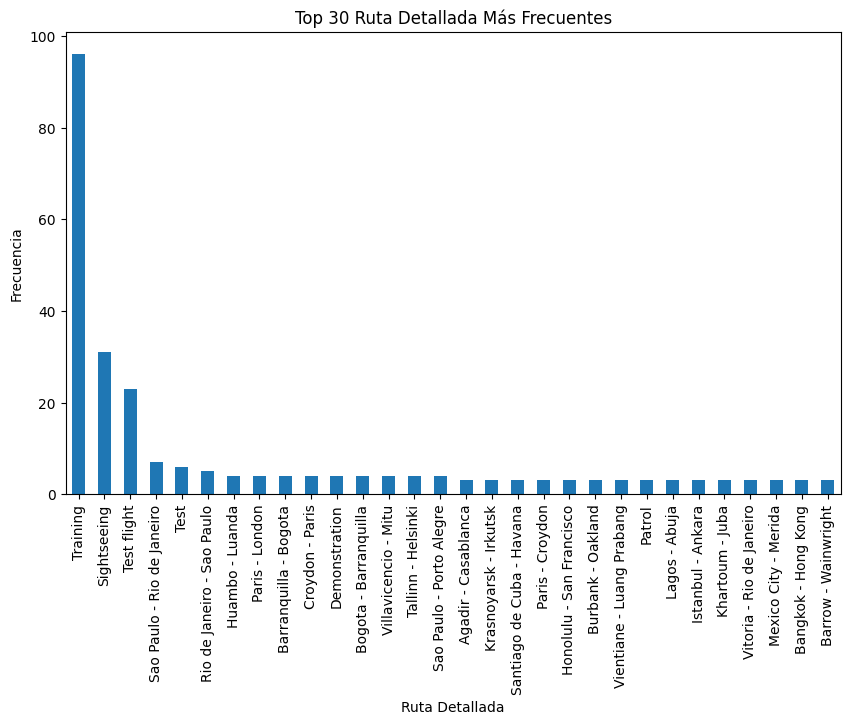

In [89]:
# Filtrar las instancias que no contienen "Sin dato" en la columna "Ruta Detallada"
frecuencias_top30 = df_accidente[df_accidente['Ruta Detallada'] != 'Sin dato']['Ruta Detallada'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Ruta Detallada Más Frecuentes')
plt.xlabel('Ruta Detallada')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


*9.6-Columna Tipo aeronave_accidente*

*Al analizar los datos, se destaca que los aviones Douglas DC-3, de Havilland Canada DHC-6 Twin Otter 300, Douglas C-47A, Douglas C-47 y Douglas DC-4 son prominentes en la lista de aviones con más accidentes. Estos aviones podrían tener una relación con las rutas con más accidentes mencionadas anteriormente, que incluyen vuelos de entrenamiento, turísticos y de prueba. Esta relación sugiere que ciertos tipos de aviones pueden estar más expuestos a situaciones de mayor riesgo en esas rutas. No obstante, es importante considerar que estos hallazgos son preliminares y se requiere un análisis más detallado para comprender completamente los factores que contribuyen a los accidentes en aviones y rutas específicas.*

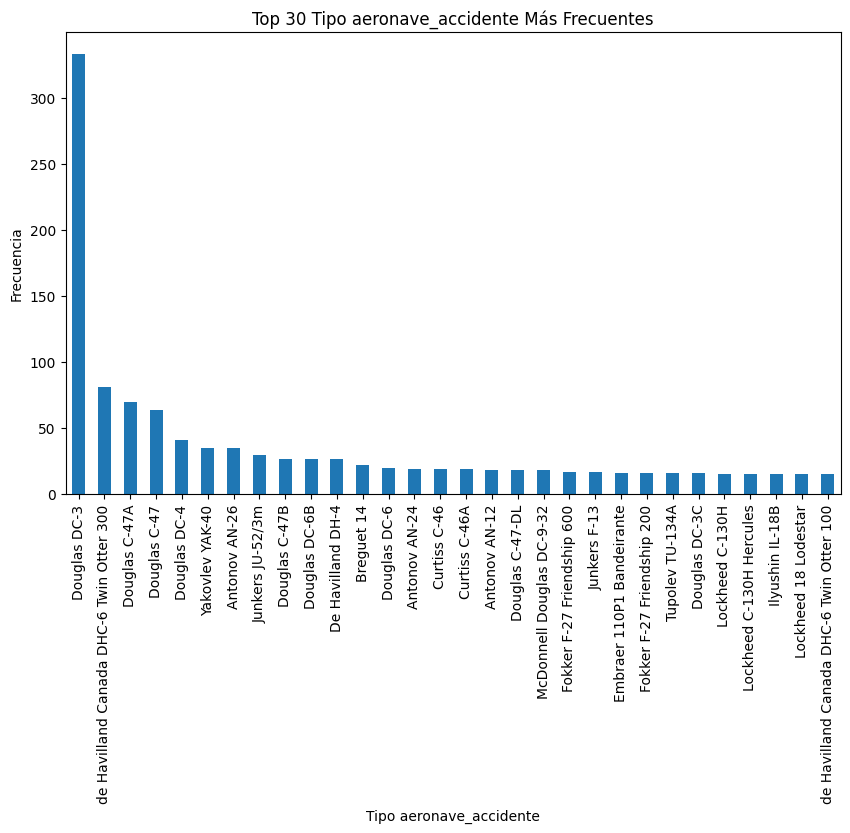

In [110]:
# Filtrar las instancias que no contienen "Sin dato" en la columna "Tipo aeronave_accidente"
frecuencias_top30 = df_accidente[df_accidente['Tipo aeronave_accidente'] != 'Sin dato']['Tipo aeronave_accidente'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Tipo aeronave_accidente Más Frecuentes')
plt.xlabel('Tipo aeronave_accidente')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

*9.7- Columna Resumen*

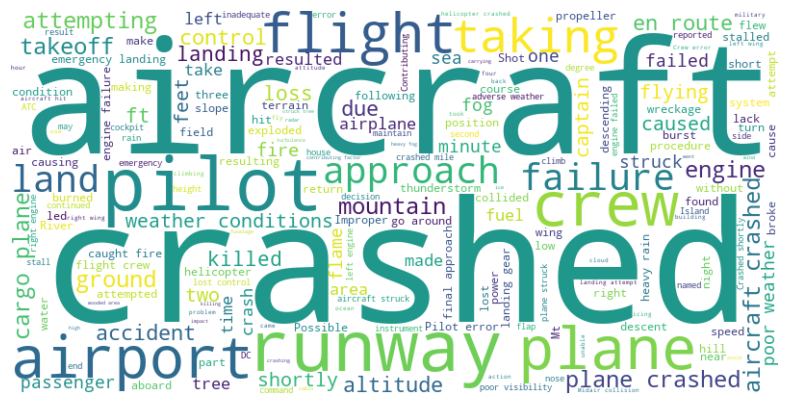

In [32]:
from wordcloud import WordCloud

# Concatenar todos los textos en una sola cadena
text = ' '.join(df_accidente['resumen'].astype(str))

# Crear el objeto WordCloud con los parámetros deseados
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras en una figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**10-Otros Análisis**

*10.1-Frecuencia Fallecidos totales por Fecha*

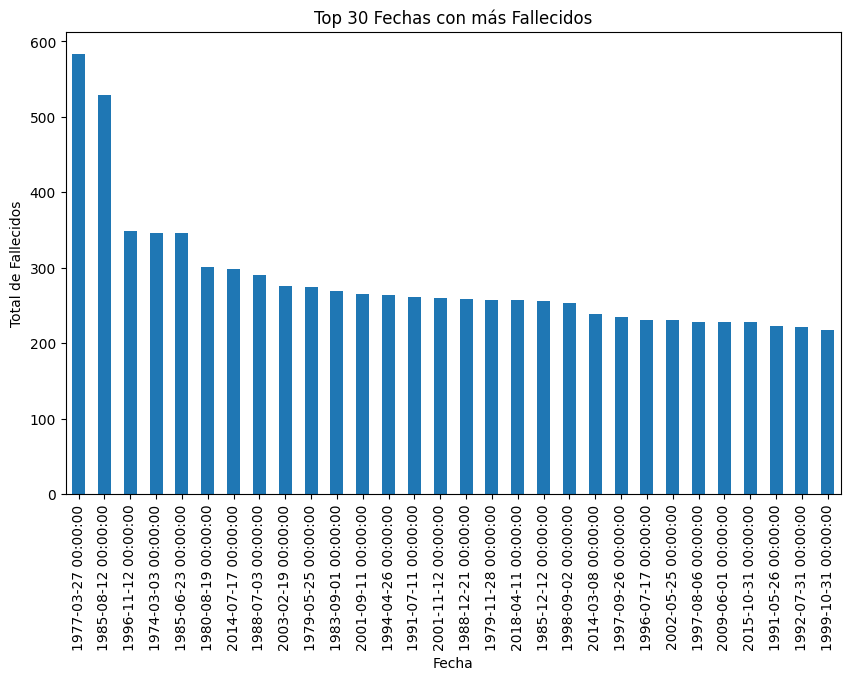

In [113]:
# Filtrar las instancias que no contienen "Sin dato" en la columna "Tipo aeronave_accidente"
frecuencias_top30 = df_accidente.groupby('Fecha')['Total_Fallecidos'].sum().nlargest(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
frecuencias_top30.plot(kind='bar')

# Personalizar el gráfico
plt.title('Top 30 Fechas con más Fallecidos')
plt.xlabel('Fecha')
plt.ylabel('Total de Fallecidos')

# Mostrar el gráfico
plt.show()


*10.2-Frecuencia Fallecidos por Hora*

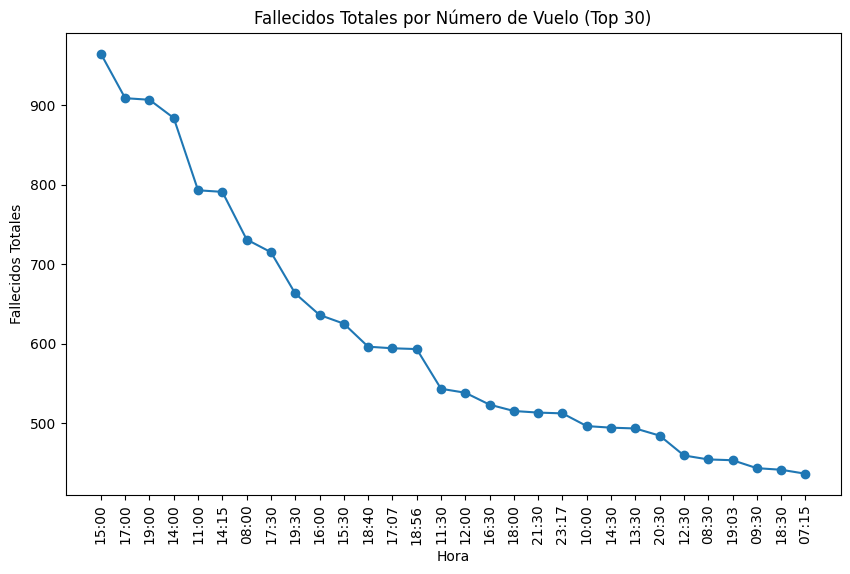

In [114]:
# Filtrar las instancias que no tienen "Sin dato" en la columna "N° de Vuelo"
df_filtered = df_accidente[df_accidente['Hora'] != 'Sin dato']

# Obtener el top 30 de fallecidos totales por número de vuelo
top30_vuelo = df_filtered.groupby('Hora')['Total_Fallecidos'].sum().nlargest(30)

# Obtener los valores del número de vuelo y de fallecidos totales del top 30
num_vuelo_top30 = top30_vuelo.index
fallecidos_totales_top30 = top30_vuelo.values

# Crear la gráfica de tendencia del top 30
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.plot(num_vuelo_top30, fallecidos_totales_top30, marker='o')
plt.title('Fallecidos Totales por Número de Vuelo (Top 30)')
plt.xlabel('Hora')
plt.ylabel('Fallecidos Totales')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

*11- Pairplot y matriz de correlación entre las variables*

**En la correlación se puede evidenciar a simple vista lo siguiente:**

* *Existe una correlación fuerte entre el total de personas a bordo y el total de fallecidos en los accidentes. Esto sugiere que a medida que aumenta el número de personas a bordo de una aeronave, también aumenta la probabilidad de que haya un mayor número de fallecidos en caso de un accidente.*

* *Hay una correlación entre el total de pasajeros en los accidentes y tanto el total de personas a bordo como el total de fallecidos. Esto indica que la cantidad de pasajeros en un accidente está relacionada con la cantidad total de personas a bordo y la gravedad de los resultados, lo que sugiere que los pasajeros pueden tener un impacto significativo en el resultado de un accidente.*

* *Existe una correlación entre el total de tripulantes y la cantidad de tripulantes fallecidos en los accidentes. Esto sugiere que la cantidad de tripulantes presentes en un accidente puede influir en la probabilidad de que los tripulantes resulten fallecidos.*

Estas conclusiones destacan la importancia de considerar el número de personas a bordo, tanto pasajeros como tripulantes, en relación con los resultados de seguridad en los accidentes aéreos. Estos factores pueden desempeñar un papel significativo en la gravedad de las consecuencias de un accidente y deben ser tenidos en cuenta en la planificación y gestión de la seguridad aérea.*

ValueError: could not convert string to float: 'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.'

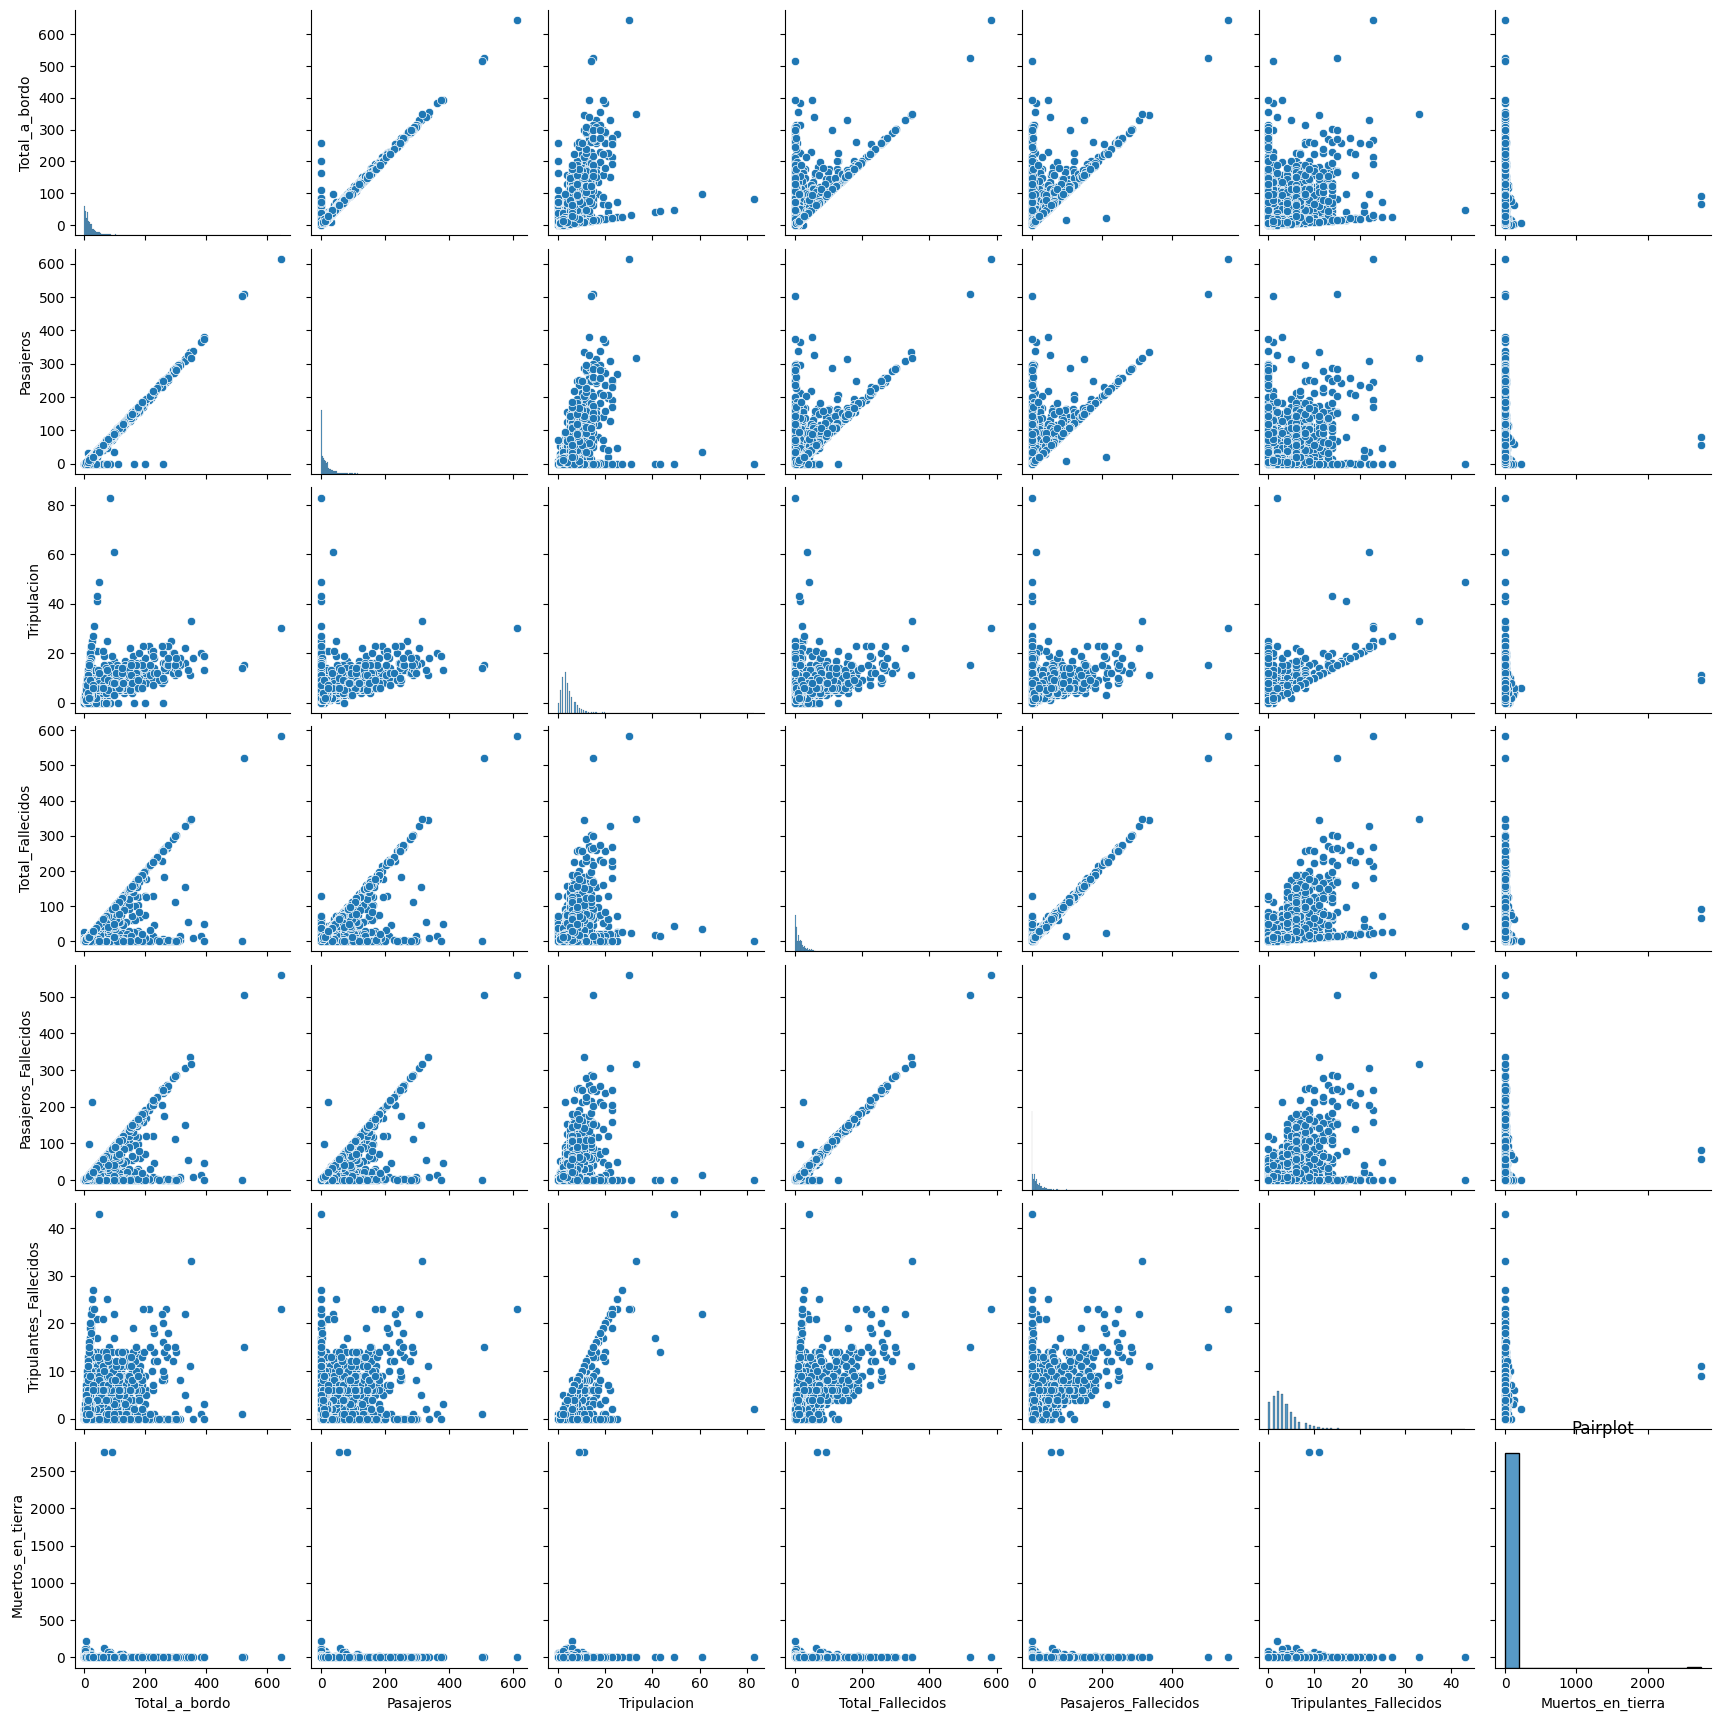

In [24]:
# Pairplot y Matriz de correlacion
sns.pairplot(df_accidente)
plt.title('Pairplot')

# Matriz de correlación
correlation_matrix = df_accidente.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Matriz de correlación')

plt.show()

In [16]:
## Exportamos archivo para trabajar en POWER BI

columnas = ["Fecha","Operador", "Ruta Detallada", "Tipo aeronave_accidente", "Pasajeros", 
            "Tripulacion", "Pasajeros_Fallecidos","Tripulantes_Fallecidos","Muertos_en_tierra", "resumen"]
df_accidente2 = pd.DataFrame(df_accidente[columnas])
df_accidente2.to_csv('df_accidente2.csv')
print("Dataset transformado exportado")

Dataset transformado exportado
